# 3. Exploring Data Analysis

## Import libraries and load datasets

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [30]:
plot_folder = "../img"

if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

question11_path = os.path.join(plot_folder, "question11.png")
question12_path = os.path.join(plot_folder, "question12.png")
question21_path = os.path.join(plot_folder, "question21.png")
question22_path = os.path.join(plot_folder, "question22.png")
question3_path = os.path.join(plot_folder, "question3.png")
question41_path = os.path.join(plot_folder, "question41.png")
question42_path = os.path.join(plot_folder, "question42.png")
question43_path = os.path.join(plot_folder, "question43.png")
question5_path = os.path.join(plot_folder, "question5.png")
question61_path = os.path.join(plot_folder, "question61.png")
question62_path = os.path.join(plot_folder, "question62.png")

In [4]:
# Load data
df_cleaned = pd.read_csv('../data/clean_hcmc_waq.csv')
df_cleaned['date_time'] = pd.to_datetime(df_cleaned['date_time'])

## 3.1. Exploring data

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_time                17544 non-null  datetime64[ns]
 1   temperature_2m           17544 non-null  float64       
 2   relative_humidity_2m     17544 non-null  float64       
 3   dew_point_2m             17544 non-null  float64       
 4   apparent_temperature     17544 non-null  float64       
 5   precipitation            17544 non-null  float64       
 6   cloud_cover              17544 non-null  float64       
 7   vapour_pressure_deficit  17544 non-null  float64       
 8   wind_speed_10m           17544 non-null  float64       
 9   wind_direction_10m       17544 non-null  float64       
 10  pm10                     17544 non-null  float64       
 11  pm2_5                    17544 non-null  float64       
 12  carbon_monoxide          17544 n

In [6]:
df_cleaned.head()

,date_time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,cloud_cover,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,weather_status
0,2022-10-01 07:00:00,25.511000,94.49476,24.561,31.543438,1.3,100.0,0.179606,2.902413,209.74480,61.2,42.1,1123.0,50.80,11.50,4.0,73.652490,Light Rain
1,2022-10-01 08:00:00,26.411001,88.26100,24.311,31.320229,0.6,100.0,0.403905,9.504272,232.69597,36.9,24.9,906.0,43.05,11.25,14.0,76.471634,Moderate Drizzle
2,2022-10-01 09:00:00,26.911001,88.03870,24.761,32.211530,0.7,100.0,0.423807,8.788720,214.99210,28.0,18.5,598.0,31.95,10.90,27.0,77.597520,Moderate Drizzle
3,2022-10-01 10:00:00,28.011000,85.29904,25.311,33.920822,0.6,100.0,0.555415,7.072878,194.74360,24.2,15.9,281.0,19.70,10.50,48.0,78.182625,Moderate Drizzle
4,2022-10-01 11:00:00,29.011000,78.12226,24.811,34.491055,0.4,100.0,0.875935,7.754637,201.80147,26.0,17.1,213.0,14.25,10.50,67.0,78.430855,Light Drizzle


### Features

This dataset contains 17,544 records capturing various weather and air quality metrics at specific timestamps. Each entry includes:

1. `date_time`: Timestamp for each entry.
2. `temperature_2m`: Ambient temperature (°C) at 2m above ground.
3. `relative_humidity_2m`: Air moisture percentage at 2m.
4. `dew_point_2m`: Temperature (°C) at which air moisture condenses.
5. `apparent_temperature`: Perceived “feels-like” temperature.
6. `precipitation`: Rainfall in mm.
7. `cloud_cover`: Sky cloudiness percentage.
8. `vapour_pressure_deficit`: Difference between actual and max vapor pressure.
9. `wind_speed_10m`: Wind speed at 10m (m/s).
10. `wind_direction_10m`: Wind direction at 10m (degrees).
11. `pm10 and pm2_5`: Particulate matter levels (PM10 and PM2.5).
12. `carbon_monoxide, nitrogen_dioxide, sulphur_dioxide, ozone`: Concentrations of major air pollutants (ppm).
13. `us_aqi`: Air Quality Index.
14. `weather_status`: Observed weather condition descriptor.

### Numerical analysis using descriptive statistics

**Basic descriptive statistics include:**
* ***Mean***: The average value of all the data points in the dataset.
* ***Median***: The middle value of the dataset when the data points are sorted in ascending order.
* ***Mode***: The most frequent value in the dataset.
* ***Range***: The difference between the largest and smallest values in the dataset.
* ***Interquartile range (IQR)***: The difference between the 75th and 25th percentiles of the dataset.
* ***Variance***: A measure of how spread out the data points are around the mean.
* ***Standard deviation (std dev)***: The square root of the variance.
* ***Coefficient of variation***: A measure of relative dispersion, calculated as the standard deviation divided by the mean.
* ***Skewness***: A measure of the asymmetry of the distribution.
* ***Kurtosis***: A measure of the peakedness of the distribution.

In [7]:
df_num = df_cleaned.select_dtypes(exclude='object').copy()
df_num.describe()

,date_time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,cloud_cover,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi
count,17544,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,2023-10-01 18:30:00,27.713273,77.605035,23.041187,32.235799,0.261018,77.247264,0.908258,8.811136,178.227551,35.004606,23.450108,448.030096,28.219779,20.958279,52.991678,74.183055
min,2022-10-01 07:00:00,18.886003,33.975716,17.611000,23.511057,0.000000,0.000000,0.000000,0.000000,1.169115,0.400000,0.300000,59.000000,0.000000,0.000000,0.000000,20.203910
25%,2023-04-02 00:45:00,25.411001,68.137776,21.811000,30.017985,0.000000,60.000000,0.299158,5.351785,119.463693,22.600000,14.800000,271.000000,14.900000,10.600000,20.000000,59.645390
50%,2023-10-01 18:30:00,27.011000,81.523735,23.861000,31.868264,0.000000,99.000000,0.656393,7.968939,162.645890,31.500000,21.000000,380.000000,24.000000,19.000000,43.000000,71.715420
75%,2024-04-01 12:15:00,29.761000,90.912483,24.611000,34.355937,0.100000,100.000000,1.283162,11.609651,242.783970,43.500000,29.300000,553.000000,38.100000,29.000000,79.000000,85.939710
max,2024-10-01 06:00:00,36.285998,100.000000,27.261000,40.862864,21.400000,100.000000,2.759168,30.085318,360.000000,158.800000,110.600000,3149.000000,170.350000,56.600000,272.000000,125.381190
std,NaN,3.113382,16.307714,2.211417,3.388188,1.082902,33.652476,0.775178,4.670804,90.356012,16.992190,11.790435,256.733868,17.908913,13.631780,41.059168,19.428913


#### ***Comment:***
* The dataset indicates relatively stable weather conditions with temperatures averaging around 27.7°C and humidity at 77.6%. This suggests that the climate is consistently warm and humid, typical for tropical regions like Ho Chi Minh City.
* While the average air quality index (AQI) is 74.2, there is noticeable variability with some days experiencing higher levels of pollution, particularly with PM2.5 and nitrogen dioxide. This indicates that air quality fluctuates, potentially due to factors like traffic or industrial activity.
* The range in precipitation (from 0 mm to 21.4 mm) and cloud cover (from 0% to 100%) highlights the dynamic weather patterns in the city. These fluctuations suggest the occurrence of both dry, sunny periods and intense rainfall.

### Correlation between features

To effectively predict air quality and weather conditions in HCMC, understanding the relationships between various weather and air quality factors is essential. This analysis helps identify the key features that significantly impact environmental conditions and contribute most to accurate predictions of air quality and weather patterns.

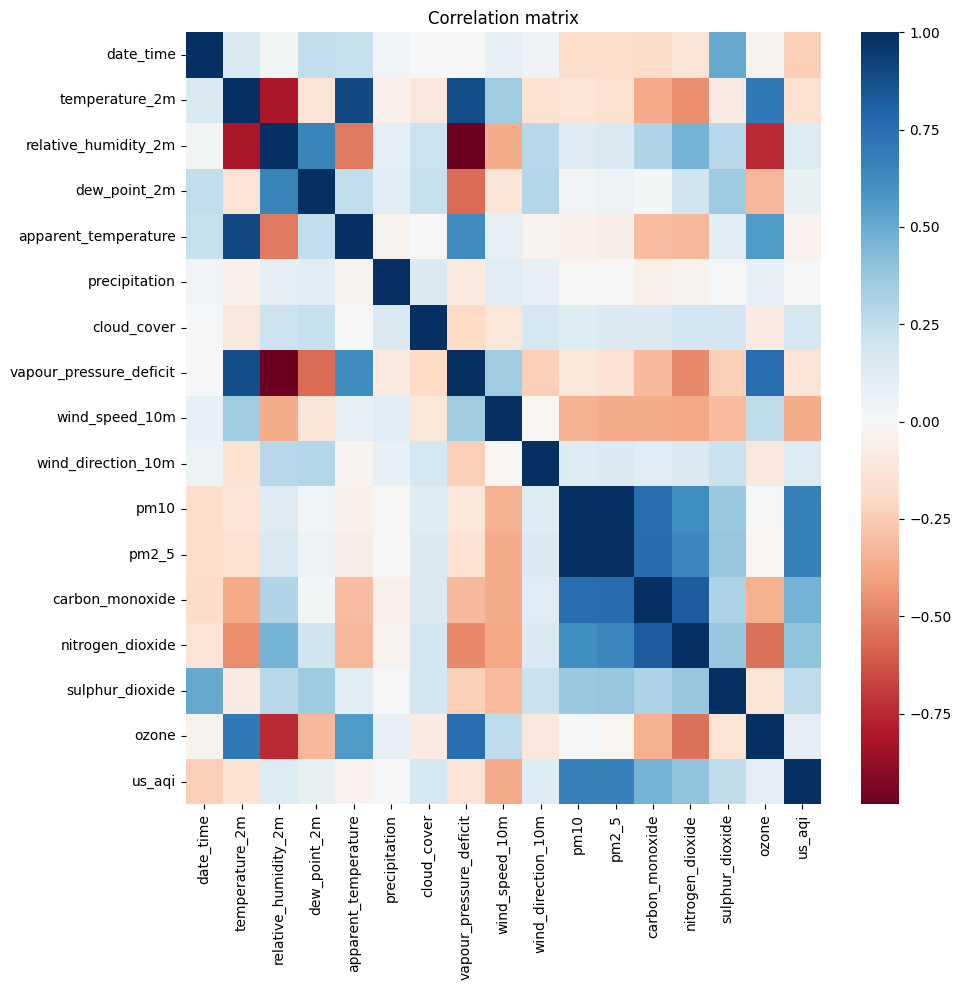

In [8]:
# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_num.corr(), cmap='RdBu', center=0,ax=ax)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

#### ***Comment:***
* We can see the **strongest correlations**:
    * ***Possitive correlation between PM10 and PM2.5***: This suggests that these pollutants often come from similar sources or are influenced by similar environmental conditions.
    * ***Negative correlation between Relative Humidity and Vapour pressure deficit***: Higher humidity means the air is closer to saturation, resulting in a lower VPD. This relationship is essential in understanding moisture levels in the air, which impacts weather patterns and air quality condition.
* Between **Weather and Air Quality**, there're some important correlations:
    * ***Positive correltion between Ozone and Temperature***: As temperature rises, ozone levels tend to increase. This is likely due to warmer temperatures accelerating chemical reactions that produce ozone, especially in urban areas with pollutants, impacting air quality on hot days.
    * ***Negative correlation between Ozone and Relative Humidity***: Higher humidity conditions may hinder ozone formation or persistence, a pattern observed in some urban atmospheres.

$\Rightarrow$ There're connections between weather and air quality factors in HCMC. Pollutants like PM10 and PM2.5 tend to increase together, suggesting common sources or environmental influences. Humidity and vapour pressure deficit are inversely related, showing how moisture levels impact air conditions. Temperature and humidity also influence ozone levels, with warmer temperatures increasing ozone and higher humidity potentially reducing it. These insights emphasize the complex interactions between weather and air quality, which are crucial for effective monitoring and management of urban air conditions.

## 3.2. Making Questions

### Question 1: Is there a correlation between wind speed/direction and PM10 levels? Does wind from certain directions bring higher pollution levels?

**Answering this question will** help us understand how wind patterns impact air quality, aiding in pollution prediction and control. This insight can assist urban planners and environmental agencies in identifying areas at risk of higher pollution due to prevailing winds, enabling more targeted interventions.

**How we answer this question:** 
* Analyze correlations between `wind_speed_10m`, `wind_direction_10m`, and pollutant levels (`pm10`) to see if higher or lower wind speeds affect pollutant concentrations.
* Determine if specific wind directions correlate with higher pollutant levels by segmenting data by `wind_direction_10m` and `pm10` values for each direction.

C:\Users\loc11\AppData\Local\Temp\ipykernel_41976\179179376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['wind_dir_bin'] = pd.cut(df1['wind_direction_10m'], bins=np.arange(0, 361, 30), right=False)
C:\Users\loc11\AppData\Local\Temp\ipykernel_41976\179179376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['wind_speed_bin'] = pd.cut(df1['wind_speed_10m'], bins=np.arange(0, df1['wind_speed_10m'].max() + 1, 2))
C:\Users\loc11\AppData\Local\Temp\ipykernel_41976\179179376.py:7: FutureWarning: T

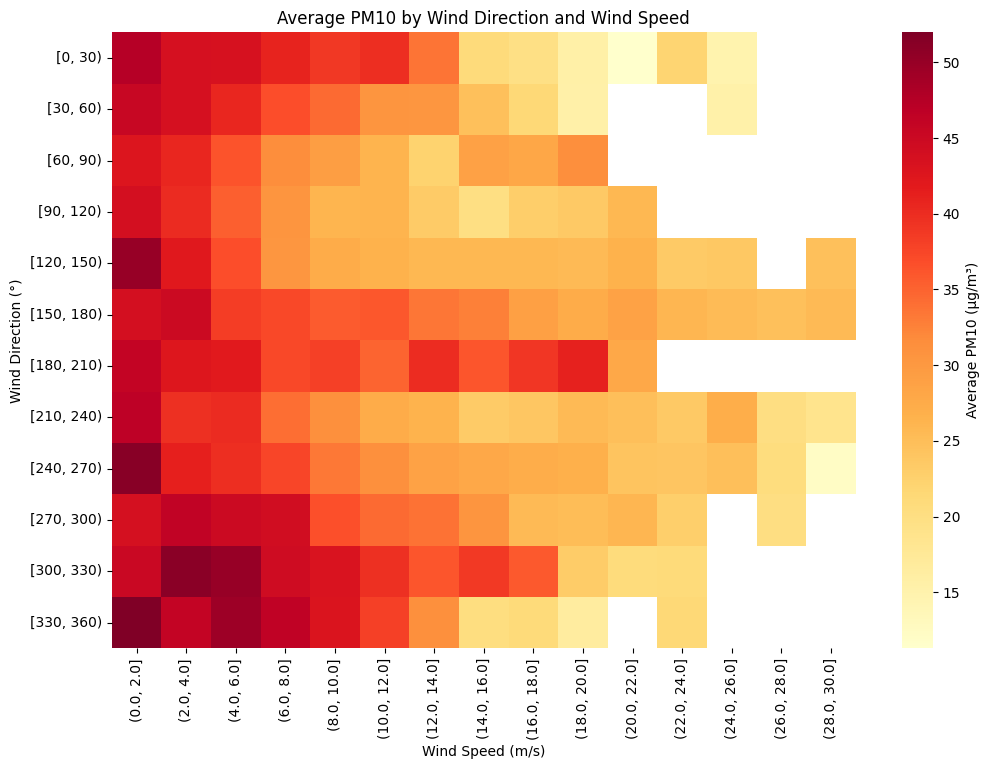

In [9]:
df1 = df_cleaned[['wind_speed_10m', 'wind_direction_10m', 'pm10']]

df1['wind_dir_bin'] = pd.cut(df1['wind_direction_10m'], bins=np.arange(0, 361, 30), right=False)
df1['wind_speed_bin'] = pd.cut(df1['wind_speed_10m'], bins=np.arange(0, df1['wind_speed_10m'].max() + 1, 2))

# Calculate average PM10 concentration for each bin
heatmap_data = df1.groupby(['wind_dir_bin', 'wind_speed_bin'])['pm10'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Average PM10 (µg/m³)'})
plt.title('Average PM10 by Wind Direction and Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction (°)')
plt.savefig(question11_path)
plt.show()


#### **Comments**
Based on the heatmap, we can observe the following:

* ***Wind Speed and PM10 Levels:*** Higher wind speeds (to the right on the x-axis) generally correlate with lower average PM10 concentrations. This trend suggests that as wind speed increases, it disperses particulate matter, lowering pollution concentrations in the area.

* ***Wind Direction and PM10 Levels:*** There are some directions that show relatively higher PM10 levels. For example:
    * Lower wind speeds (left side of the x-axis) in the direction range 0°-120° (top of the y-axis) are associated with higher PM10 concentrations.
    * The directions around 270°-300° also have slightly elevated PM10 levels, although not as high as those in the 0°-120° range.
    
$\Rightarrow$ This indicates that winds from certain directions (0°-120° and to a lesser extent, 270°-300°) might bring in higher levels of particulate pollution when the wind speed is low. Wind direction and speed both impact PM10 levels, with lower speeds and specific directions correlating with higher pollution. 

C:\Users\loc11\AppData\Local\Temp\ipykernel_41976\2601945102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['wind_direction_category'] = pd.cut(df1['wind_direction_10m'], bins=direction_bins, labels=direction_labels, include_lowest=True)
C:\Users\loc11\AppData\Local\Temp\ipykernel_41976\2601945102.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pollution_by_direction = df1.groupby('wind_direction_category')['pm10'].mean()


Average PM10 by wind direction:
 wind_direction_category
N     39.734267
NE    34.259903
E     28.603598
SE    33.062536
S     36.334359
SW    32.162137
W     41.508407
NW    45.896012
Name: pm10, dtype: float64


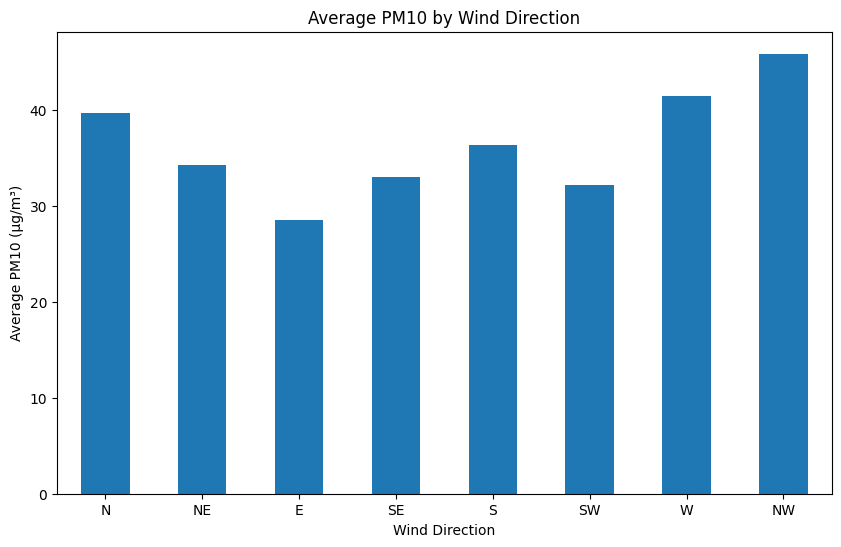

In [10]:
# Define wind direction bins and labels
direction_bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
direction_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

df1['wind_direction_category'] = pd.cut(df1['wind_direction_10m'], bins=direction_bins, labels=direction_labels, include_lowest=True)

# Calculate the mean pollutant levels for each wind direction category
pollution_by_direction = df1.groupby('wind_direction_category')['pm10'].mean()
print("Average PM10 by wind direction:\n", pollution_by_direction)

direction_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

pollution_by_direction.plot(kind='bar', figsize=(10, 6))
plt.title("Average PM10 by Wind Direction")
plt.xlabel("Wind Direction")
plt.ylabel("Average PM10 (µg/m³)")
plt.xticks(rotation=0)
plt.savefig(question12_path)
plt.show()

#### **Comments**

The wind direction is categorized into bins corresponding to compass directions (e.g., N, NE, etc.).

Based on the bar chart, we can observe the following:

* ***High PM10 Levels from West and Northwest:*** The highest average PM10 concentrations are observed when the wind comes from the West (W) and Northwest (NW) directions, with averages of 41.5 µg/m³ and 45.9 µg/m³, respectively. This suggests that winds from these directions are associated with increased PM10 levels, potentially due to sources of pollution located in those directions relative to the monitoring area.

* ***Moderate PM10 Levels from North and South:*** Winds from the North (N) and South (S) also show relatively high PM10 levels, around 39.7 µg/m³ and 36.3 µg/m³, respectively. These directions may contribute to moderate pollution levels, possibly due to additional sources or lesser dispersion effects.
* ***Lower PM10 Levels from East and Southeast:*** Winds from the East (E) and Southeast (SE) bring in lower PM10 levels, averaging 28.6 µg/m³ and 33.1 µg/m³, respectively. This could indicate that these directions either have fewer pollution sources or provide better natural dispersion for pollutants.
    
$\Rightarrow$ The data suggests that winds from the West and Northwest bring the highest PM10 pollution levels. Winds from the East and Southeast are associated with cleaner air, possibly due to fewer pollution sources or more effective pollutant dispersion in those directions.

### Question 2: How do extreme weather events (identified by weather_status) affect air quality parameters, and what are the lag effects on pollutant concentrations?

**Answering this question will** help us understand the impact of extreme weather events on air quality can help anticipate pollution levels following events like storms or heatwaves. This is crucial for managing public health responses and air quality controls during and after such events.

**How we answer this question:** 
* Use `weather_status` to identify extreme weather events (e.g., Heavy Rain, Dense Drizzle) and then analyze pollutant levels (`pm10`, `pm2_5`, `carbon_monoxide, nitrogen_dioxide, sulphur_dioxide` and `ozone`) during and after these events.
* To assess lag effects, examine pollutant levels at various intervals after extreme weather events, such as 1 hour, 6 hours, and 24 hours post-event, to observe how pollutant concentrations respond over time.

In [11]:
# Preprocess data
# Identify extreme weather events
extreme_weather_types = ['Dense Drizzle', 'Dense Freezing Drizzle', 'Heavy Rain', 'Heavy Freezing Rain', 'Heavy Snow', 'Violent Rain Showers', 'Heavy Snow Showers']
df_cleaned['is_extreme'] = df_cleaned['weather_status'].isin(extreme_weather_types)

# Define pollutants to analyze
pollutants = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone']

stats_df = pd.DataFrame()

In [12]:
# Calculate statistics for each pollutant
for pollutant in pollutants:
    # Calculate for normal weather
    normal_stats = df_cleaned[~df_cleaned['is_extreme']][pollutant].describe()
    # Calculate for extreme weather
    extreme_stats = df_cleaned[df_cleaned['is_extreme']][pollutant].describe()
    
    stats_df[f'{pollutant}_normal'] = normal_stats
    stats_df[f'{pollutant}_extreme'] = extreme_stats

# Analyze lag effect
lag_hours = [1, 6, 24]
for pollutant in pollutants:
    for lag in lag_hours:
        df_cleaned[f'{pollutant}_lag_{lag}h'] = df_cleaned[pollutant].shift(-lag)

# Calculate the average rolling values for each pollutant
window_sizes = [1, 6, 24]
for pollutant in pollutants:
    for window in window_sizes:
        df_cleaned[f'{pollutant}_rolling_{window}h'] = df_cleaned[pollutant].rolling(window=window).mean()

In [13]:
stats_df

,pm10_normal,pm10_extreme,pm2_5_normal,pm2_5_extreme,carbon_monoxide_normal,carbon_monoxide_extreme,nitrogen_dioxide_normal,nitrogen_dioxide_extreme,sulphur_dioxide_normal,sulphur_dioxide_extreme,ozone_normal,ozone_extreme
count,17294.000000,250.000000,17294.000000,250.000000,17294.000000,250.000000,17294.000000,250.000000,17294.000000,250.000000,17294.000000,250.000000
mean,34.988938,36.088400,23.433590,24.592800,448.311091,428.592000,28.210648,28.851400,20.908567,24.397200,52.861744,61.980000
std,17.023257,14.673312,11.812398,10.111413,256.804587,251.535193,17.926496,16.668852,13.655230,11.405578,41.040082,41.462757
min,0.400000,11.700000,0.300000,7.900000,59.000000,173.000000,0.000000,6.600000,0.000000,1.600000,0.000000,0.000000
25%,22.600000,26.200000,14.800000,18.025000,271.000000,273.000000,14.900000,15.300000,10.500000,17.725000,20.000000,24.250000
50%,31.500000,33.750000,21.000000,22.750000,380.000000,358.000000,24.000000,25.050000,18.900000,23.900000,43.000000,59.500000
75%,43.500000,43.250000,29.300000,29.275000,554.000000,504.500000,38.100000,39.087500,29.000000,30.725000,79.000000,90.000000
max,158.800000,106.200000,110.600000,71.900000,3149.000000,1861.000000,170.350000,106.000000,56.600000,56.600000,272.000000,185.000000


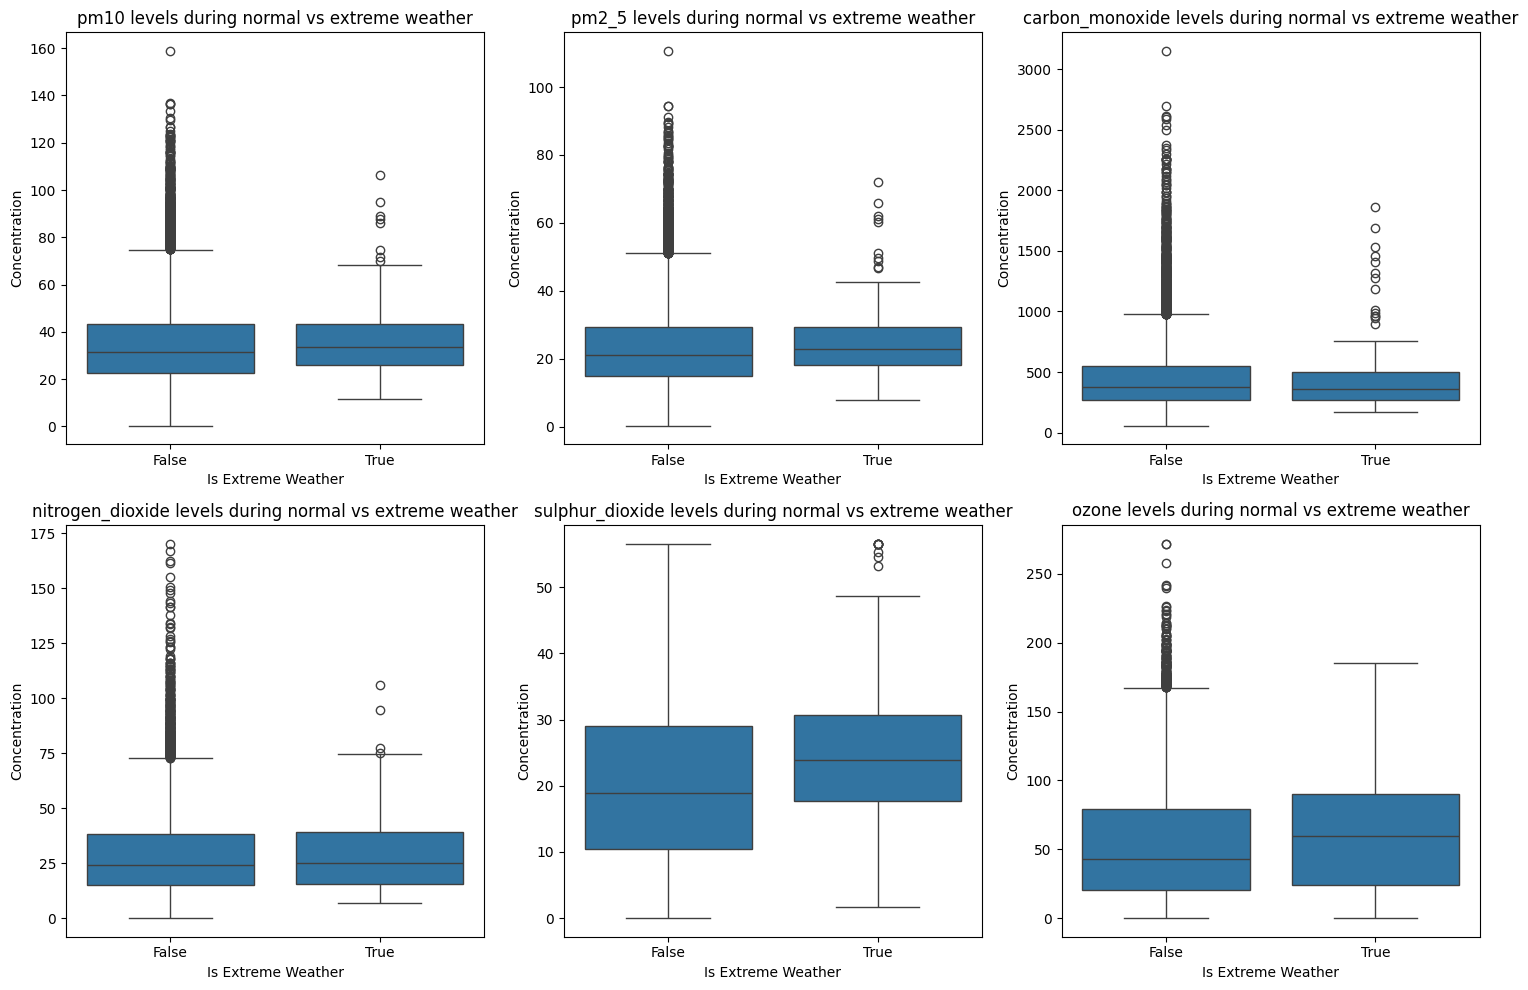

In [14]:
# Plot chart comparing pollutant concentrations 
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_extreme', y=pollutant, data=df_cleaned)
    plt.title(f'{pollutant} levels during normal vs extreme weather')
    plt.xlabel('Is Extreme Weather')
    plt.ylabel('Concentration')
plt.tight_layout()
plt.savefig(question21_path)
plt.show()

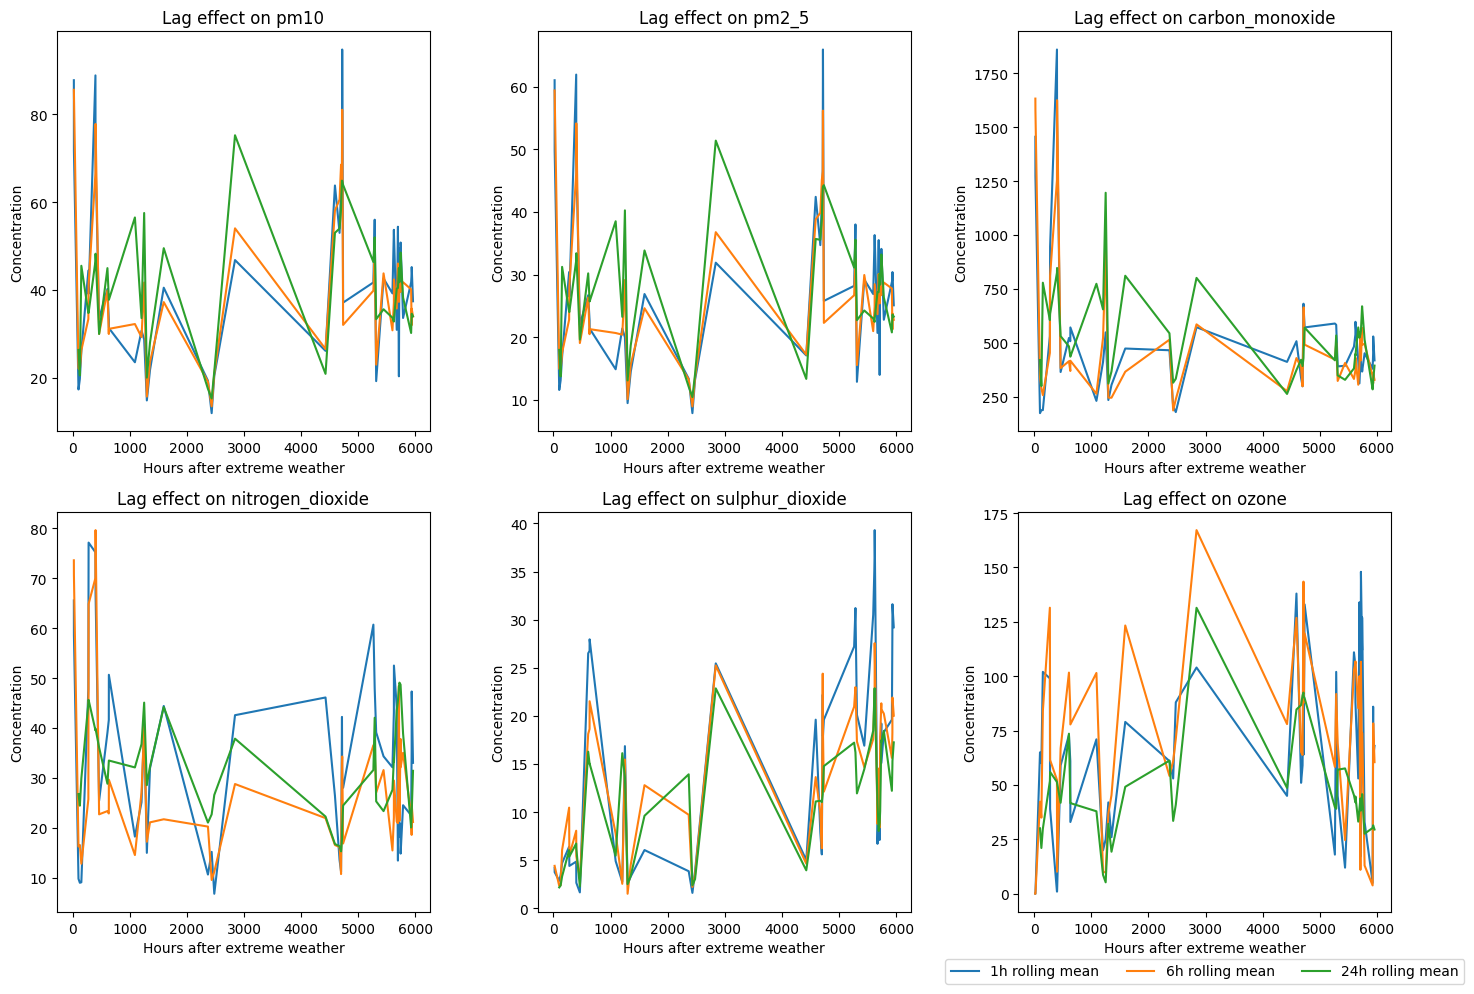

In [15]:
# Plot the chart lag effect for each pollutant
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)

    # Draw average line for each lag
    for window in window_sizes:
        plt.plot(df_cleaned[df_cleaned['is_extreme']][f'{pollutant}_rolling_{window}h'].head(48), 
                label=f'{window}h rolling mean')
    
    plt.title(f'Lag effect on {pollutant}')
    plt.xlabel('Hours after extreme weather')
    plt.ylabel('Concentration')
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.savefig(question22_path)
plt.show()


In [16]:
# Calculate t-test for each pollutant
ttest_results = []

for pollutant in pollutants:
    normal_data = df_cleaned[~df_cleaned['is_extreme']][pollutant].dropna()
    extreme_data = df_cleaned[df_cleaned['is_extreme']][pollutant].dropna()
    
    t_stat, p_val = stats.ttest_ind(normal_data, extreme_data)
    ttest_results.append({
        'pollutant': pollutant,
        't_statistic': t_stat,
        'p_value': p_val
    })

ttest_results = pd.DataFrame(ttest_results)
ttest_results

,pollutant,t_statistic,p_value
0,pm10,-1.015745,0.309765
1,pm2_5,-1.543487,0.122731
2,carbon_monoxide,1.205765,0.227924
3,nitrogen_dioxide,-0.561650,0.574362
4,sulphur_dioxide,-4.019238,0.000059
5,ozone,-3.487331,0.000489


In [17]:
# Calculate the percentage change in pollutant levels during extreme weather
percent_change = []

for pollutant in pollutants:
    normal_mean = df_cleaned[~df_cleaned['is_extreme']][pollutant].mean()
    extreme_mean = df_cleaned[df_cleaned['is_extreme']][pollutant].mean()
    
    change = ((extreme_mean - normal_mean) / normal_mean) * 100
    percent_change.append({
        'pollutant': pollutant,
        'percent_change': change
    })

percent_change = pd.DataFrame(percent_change)
percent_change

,pollutant,percent_change
0,pm10,3.142312
1,pm2_5,4.946789
2,carbon_monoxide,-4.398528
3,nitrogen_dioxide,2.271312
4,sulphur_dioxide,16.685187
5,ozone,17.249253


#### **Comments**
Based on the analysis of extreme weather effects on air quality parameters, we observe:
1. Pollutant Concentration Changes:
- SO₂ and O₃ show the most significant increases during extreme weather (+16.69% and +17.25% respectively, p<0.001)
- Carbon Monoxide uniquely shows a decrease (-4.40%), suggesting possible washout effects
- PM10 and PM2.5 show slight increases (3.14% and 4.95%) but not statistically significant
- Most pollutants show lower variability during extreme weather, indicating more stable concentrations
2. Lag Effects After Weather Events:
- Peak concentrations typically occur within the first 1000 hours post-extreme weather
- Different pollutants show varying recovery patterns:
    - CO stabilizes most quickly after events
    - PM10 and PM2.5 show gradual stabilization over 4000 hours
    - O₃ demonstrates the most pronounced and extended fluctuations
- 24-hour rolling averages show more stable trends compared to shorter timeframes

$\Rightarrow$ In summary, extreme weather events have varying impacts on different pollutants, with SO₂ and O₃ being most significantly affected. The lag effects persist for considerable periods (1000-4000 hours), suggesting the need for extended monitoring and management strategies post-extreme weather events. This information is crucial for public health response planning and air quality management during and after extreme weather conditions.

### Question 3: Are there distinct seasonal or monthly patterns in air quality metrics? 

**Answering this question will** help us understand understand how air quality varies throughout the year and the influence of seasonal weather changes. This insight is valuable for forecasting pollution trends, informing public health advisories, and developing seasonal strategies to manage air quality.

**How we answer this question:** 
* Use date_time to group data by month or season, and analyze trends in air quality metrics like `pm10`, `pm2_5`, `us_aqi`, and other pollutants over time.
* Evaluate correlations between weather metrics (`temperature_2m`, `relative_humidity_2m`, `precipitation`, `cloud_cover`, etc.) and air quality metrics to observe seasonal changes in air quality.

In [18]:
df3 = df_cleaned.copy()

# Extract year, month and season from 'date_time'
df3['month'] = df3['date_time'].dt.month
# Define seasons based on months
season_mapping = {
    1: 'Dry', 2: 'Dry', 3: 'Dry', 4: 'Dry', 5: 'Rainy', 6: 'Rainy',
    7: 'Rainy', 8: 'Rainy', 9: 'Rainy', 10: 'Rainy', 11: 'Rainy', 12: 'Dry'
}
df3['season'] = df3['month'].map(season_mapping)

df3['month_year'] = df3['date_time'].dt.to_period('M')

<Figure size 2000x600 with 0 Axes>

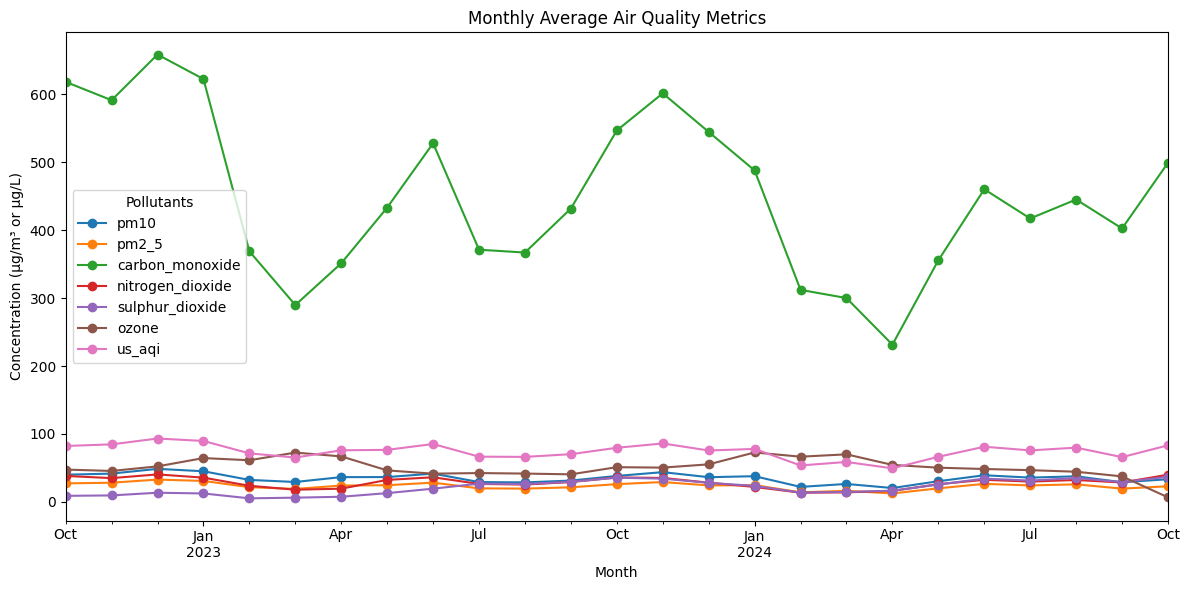

In [19]:
monthly_avg = df3.groupby('month_year')[['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 
                                    'sulphur_dioxide', 'ozone', 'us_aqi']].mean()

plt.figure(figsize=(20, 6))
monthly_avg.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Monthly Average Air Quality Metrics')
plt.xlabel('Month')
plt.ylabel('Concentration (µg/m³ or µg/L)')
plt.legend(title="Pollutants")
plt.tight_layout()
plt.savefig(question3_path)
plt.show()

#### **Comments**
Based on the line chart, we can observe the following:

* Carbon Monoxide (CO): This pollutant stands out with significantly higher concentrations than the others, fluctuating around 300–700 µg/m³. It shows a noticeable seasonal trend, with peaks around the last months of the year and lower concentrations in early summer. This suggests that CO levels might be influenced by weather conditions or emissions patterns, possibly from traffic or industrial activities.

* Other Pollutants: The rest of the pollutants (PM10, PM2.5, NO₂, SO₂, O₃, and US AQI) have relatively low concentrations compared to CO, all staying below 100 µg/m³. These pollutants exhibit smaller fluctuations and are generally stable throughout the year.

$\Rightarrow$ In summary, Carbon Monoxide levels appear to be the primary concern due to their high concentration and seasonal spikes, while other pollutants remain relatively low and stable across the months. This could indicate targeted issues related to CO pollution sources, potentially suggesting an area for further investigation or intervention.

### Question 4: What is the relationship between precipitation and air quality? Does rainfall help reduce pollutant concentrations, and if so, to what extent?

**Answering this question will** clarify whether and how rainfall affects pollutant levels, offering insights into natural pollutant reduction mechanisms. This knowledge can support air quality management strategies, particularly in regions with varying rainfall patterns, and help inform public health recommendations during different weather conditions.

**How we answer this question:**
* Examine correlations between `precipitation` and pollutant levels (`pm10`, `pm2_5`, `us_aqi`) to see if rainfall consistently lowers pollutant concentrations.
* Compare average pollutant levels with and without rainfall events to quantify the effect of precipitation on air quality.

Correlation between precipitation and pollutant levels:
pm10     -0.011551
pm2_5    -0.005645
us_aqi    0.011018
Name: precipitation, dtype: float64


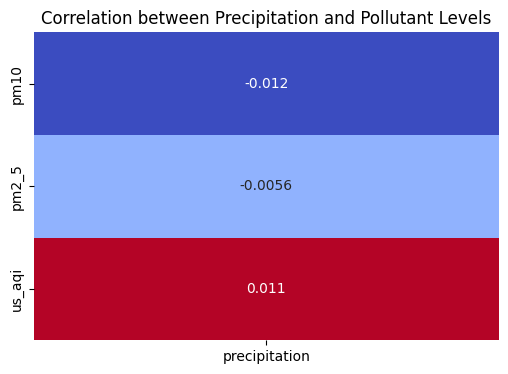

In [20]:
df4 = df_cleaned.copy()

pollutants = ['pm10', 'pm2_5', 'us_aqi']
correlations = df_cleaned[['precipitation'] + pollutants].corr()['precipitation'].drop('precipitation')
print("Correlation between precipitation and pollutant levels:")
print(correlations)

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation between Precipitation and Pollutant Levels")
plt.savefig(question41_path)
plt.show()


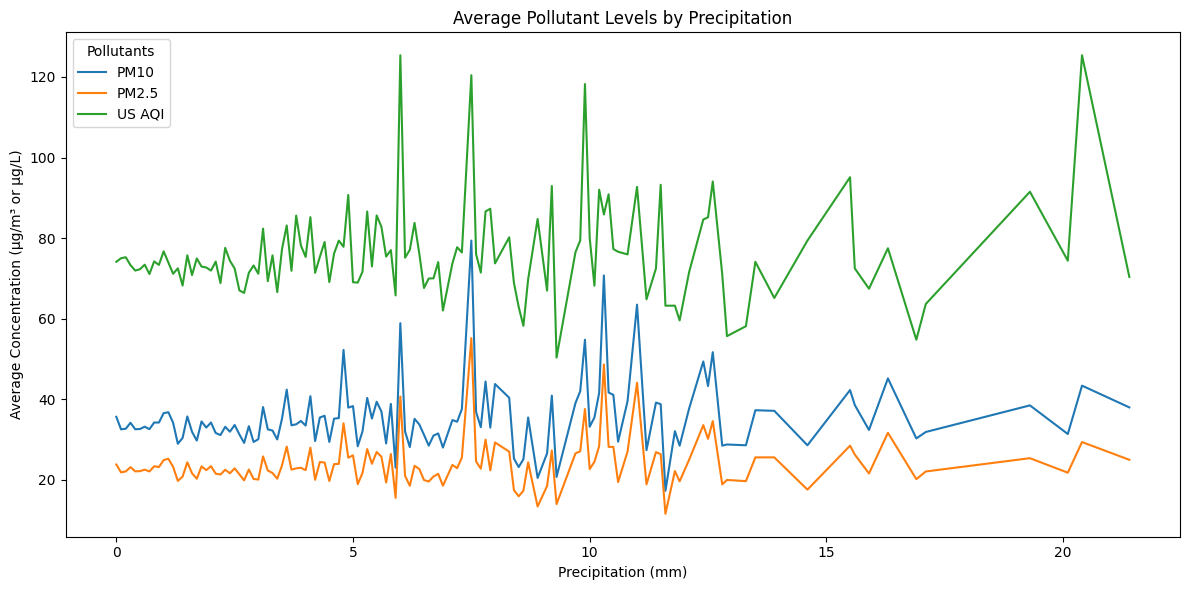

In [21]:
precipitation_data = df4.groupby('precipitation')[['pm10', 'pm2_5', 'us_aqi']].mean().reset_index()

# Plotting average pollutant levels by precipitation
plt.figure(figsize=(12, 6))
sns.lineplot(data=precipitation_data, x='precipitation', y='pm10', label='PM10')
sns.lineplot(data=precipitation_data, x='precipitation', y='pm2_5', label='PM2.5')
sns.lineplot(data=precipitation_data, x='precipitation', y='us_aqi', label='US AQI')
plt.title('Average Pollutant Levels by Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Average Concentration (µg/m³ or µg/L)')
plt.legend(title='Pollutants')
plt.tight_layout()
plt.savefig(question42_path)
plt.show()

#### **Comment**

Based on the correlation values between precipitation and pollutant levels in the charts:
* ***PM10 and PM2_5:*** Weak negative correlation (-0.012 and -0.0056), suggesting minimal reduction with rainfall. There are noticeable peaks in PM10 and PM2.5 concentrations at lower precipitation values (around 0–5 mm). This might indicate that low or no rainfall correlates with higher pollutant concentrations, possibly due to stagnant air conditions allowing pollutants to accumulate.
* ***US AQI:*** Slight positive correlation (0.011), suggesting rainfall may not lower AQI. The US AQI line shows significant variability, with sharp peaks and dips even at lower precipitation levels. This could indicate that air quality is influenced by other environmental factors beyond just precipitation, such as wind speed, temperature, or specific weather events.

$\Rightarrow$ Rainfall shows minimal impact on pollutant levels.


Average pollutant levels for Rain and No Rain events:
                     pm10      pm2_5     us_aqi
rainfall_event                                 
No Rain         35.323780  23.609331  74.227028
Rain            33.359698  22.629533  73.956431


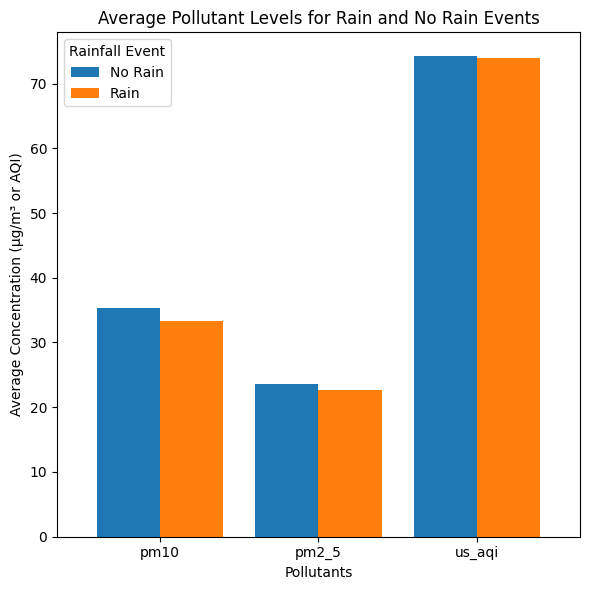

In [22]:
# Define rainfall events: Assume rainfall > 0.1 mm as a rainfall event
df4['rainfall_event'] = np.where(df4['precipitation'] > 0.1, 'Rain', 'No Rain')

# Group by rainfall event and calculate mean pollutant levels
rainfall_effect = df4.groupby('rainfall_event')[pollutants].mean()

print("\nAverage pollutant levels for Rain and No Rain events:")
print(rainfall_effect)

# Transpose the dataframe for easier plotting with pollutants on the x-axis
rainfall_effect = rainfall_effect.T

# Plot as grouped bar chart
ax = rainfall_effect.plot(kind='bar', figsize=(6, 6), width=0.8)
plt.title("Average Pollutant Levels for Rain and No Rain Events")
plt.xlabel("Pollutants")
plt.ylabel("Average Concentration (µg/m³ or AQI)")
plt.legend(title="Rainfall Event")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(question43_path)
plt.show()

#### **Comment**

Based on the Average pollutant levels in the chart:
* ***PM10:*** lower during "Rain" (33.36 µg/m³) compared to "No Rain" (35.32 µg/m³), suggesting a slight reduction in particulate matter during rainfall.
* ***PM2.5:*** lower during "Rain" (22.63 µg/m³) compared to "No Rain" (23.61 µg/m³), indicating that rainfall might help reduce smaller particulates as well.
* ***US AQI:*** remains relatively stable across different rainfall events, with only minor fluctuations. This implies that rainfall does not significantly influence overall air quality (as represented by AQI).

$\Rightarrow$ Rainfall seems to contribute slightly to the reduction of particulate pollutants (PM10 and PM2.5), but the effect is relatively minor and not strong enough to significantly impact the overall air quality (as reflected by AQI). This finding implies that while rain can help reduce pollutant levels, it may not be sufficient to substantially improve air quality on its own.

### Question 5: Are there specific times of day (morning, afternoon, evening) when pollution levels tend to be higher?

**Answering this question will** help us identify peak times for pollution during the day, which can be crucial for public health advisories and urban planning. Understanding daily pollution patterns enables environmental agencies to provide timely warnings and helps the public avoid outdoor activities during high-pollution periods.

**How we answer this question:** 
* Extract the hour from the date_time column to categorize data into time periods: morning, afternoon, and evening.
* Calculate and compare average pollutant levels (e.g., pm10, pm2_5, ozone) for each time period to determine if certain times of day consistently show higher pollution levels.

In [23]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

Average Pollution Levels by Time of Day:
                  pm10      pm2_5       ozone
time_of_day                                  
Morning      31.806175  21.311003   46.114716
Afternoon    33.790926  22.350479  102.154127
Evening      37.701977  25.411155   30.552046


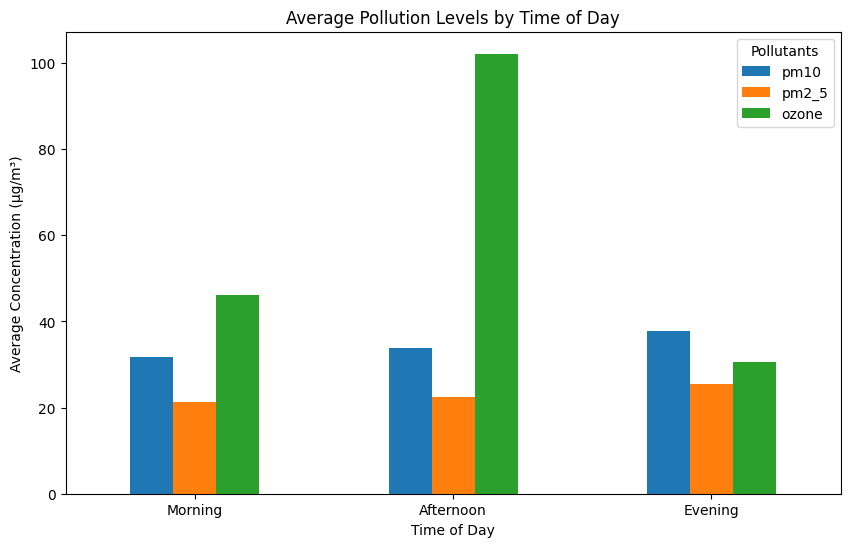

In [24]:
df5 = df_cleaned.copy()

df5['time_of_day'] = df5['date_time'].dt.hour.apply(categorize_time_of_day)

# Calculate average pollutant levels by time of day
pollutants = ['pm10', 'pm2_5', 'ozone']  # Add or remove pollutants as needed
avg_pollution_by_time = df5.groupby('time_of_day')[pollutants].mean()

# Sort to show in a logical order: Morning, Afternoon, Evening
avg_pollution_by_time = avg_pollution_by_time.reindex(['Morning', 'Afternoon', 'Evening'])

# Display the results
print("Average Pollution Levels by Time of Day:")
print(avg_pollution_by_time)


avg_pollution_by_time.plot(kind='bar', figsize=(10, 6))
plt.title("Average Pollution Levels by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Concentration (µg/m³)")
plt.xticks(rotation=0)
plt.legend(title="Pollutants")
plt.savefig(question5_path)
plt.show()

#### **Comments**
Based on the chart, we can observe the following:

* ***Ozone Levels:*** Ozone concentrations are highest in the morning (around 95.8 µg/m³) and significantly decrease in the afternoon and evening (31.2 µg/m³ and 37.6 µg/m³, respectively). This trend could be influenced by sunlight and cloud cover variations throughout the day. Ozone formation is typically affected by sunlight, so lower afternoon and evening values may reflect cloud cover or reduced sunlight intensity as the day progresses.

* ***PM10 and PM2.5***: PM10 and PM2.5 levels are somewhat consistent across different times of day, with slightly higher concentrations in the afternoon. This pattern suggests that these particulate pollutants might be less sensitive to sunlight or cloud cover and more affected by traffic or industrial activities, which remain steady throughout the day.

$\Rightarrow$ Im summary, ozone levels peak in the morning, likely due to favorable conditions for ozone formation, such as sunlight availability and less cloud cover, while PM10 and PM2.5 are consistent with slightly higher concentrations in the afternoon.

### Question 6: How do temperature patterns (temperature_2m, apparent_temperature) vary across different time periods (daily, monthly)? Are there significant anomalies in temperature trends?

**Answering this question will** help us understand how temperature patterns vary over different time periods and identify any significant anomalies. This insight is valuable for climate studies, urban planning, and public health advisories.

**How we answer this question:** 
* Analyze daily, monthly, and seasonal temperature patterns using `temperature_2m` and `apparent_temperature`.
* Identify significant anomalies by comparing observed temperatures with historical averages and calculating deviations.
* Visualize temperature trends and anomalies using line plots and heatmaps.

In [25]:
# Preprocess data
df6 = df_cleaned.copy()

# Create time-based features
df6['month'] = df6['date_time'].dt.month
df6['day'] = df6['date_time'].dt.day
df6['hour'] = df6['date_time'].dt.hour

In [26]:
# Calculate daily average temperature and apparent temperature
daily_temps = df6.groupby(df6['date_time'].dt.date).agg({
    'temperature_2m': ['mean', 'min', 'max'],
    'apparent_temperature': ['mean', 'min', 'max']
}).round(2)

# Calculate anomalies
temp_mean = df6['temperature_2m'].mean()
daily_temp_anomalies = daily_temps['temperature_2m']['mean'] - temp_mean

print("Daily Temperature Statistics:")
print(daily_temps.head())
print("\nTop 5 Temperature Anomalies:")
print(daily_temp_anomalies.nlargest(5))

Daily Temperature Statistics:
           temperature_2m               apparent_temperature              
                     mean    min    max                 mean    min    max
date_time                                                                 
2022-10-01          26.52  24.76  29.41                31.80  30.06  35.04
2022-10-02          26.01  23.76  28.21                31.15  28.71  33.09
2022-10-03          26.58  23.91  29.96                31.16  28.85  35.39
2022-10-04          26.76  23.36  29.91                31.86  27.50  36.82
2022-10-05          25.96  24.06  30.16                30.77  28.59  35.74

Top 5 Temperature Anomalies:
date_time
2024-05-02    4.546727
2024-05-03    4.546727
2024-05-01    4.266727
2023-05-06    4.156727
2024-04-28    4.126727
Name: mean, dtype: float64


In [27]:
# Calculate monthly average temperature and apparent temperature
monthly_temps = df6.groupby('month').agg({
    'temperature_2m': ['mean', 'min', 'max'],
    'apparent_temperature': ['mean', 'min', 'max']
}).round(2)

print("Monthly Temperature Statistics:")
print(monthly_temps)

Monthly Temperature Statistics:
      temperature_2m               apparent_temperature              
                mean    min    max                 mean    min    max
month                                                                
1              26.82  20.31  34.36                30.09  23.51  38.69
2              28.11  21.01  36.29                30.92  23.51  39.27
3              28.78  21.11  36.29                31.73  23.51  40.86
4              30.36  23.66  36.29                34.60  28.35  40.86
5              29.28  24.11  36.29                34.89  28.77  40.86
6              27.89  23.91  34.51                33.53  29.05  40.86
7              26.96  23.71  32.46                32.04  28.10  40.39
8              27.53  23.71  33.56                32.97  27.62  40.85
9              26.80  23.56  32.61                31.95  27.73  40.17
10             26.53  21.26  32.46                31.83  24.17  40.24
11             26.57  21.06  32.51                31.61  2

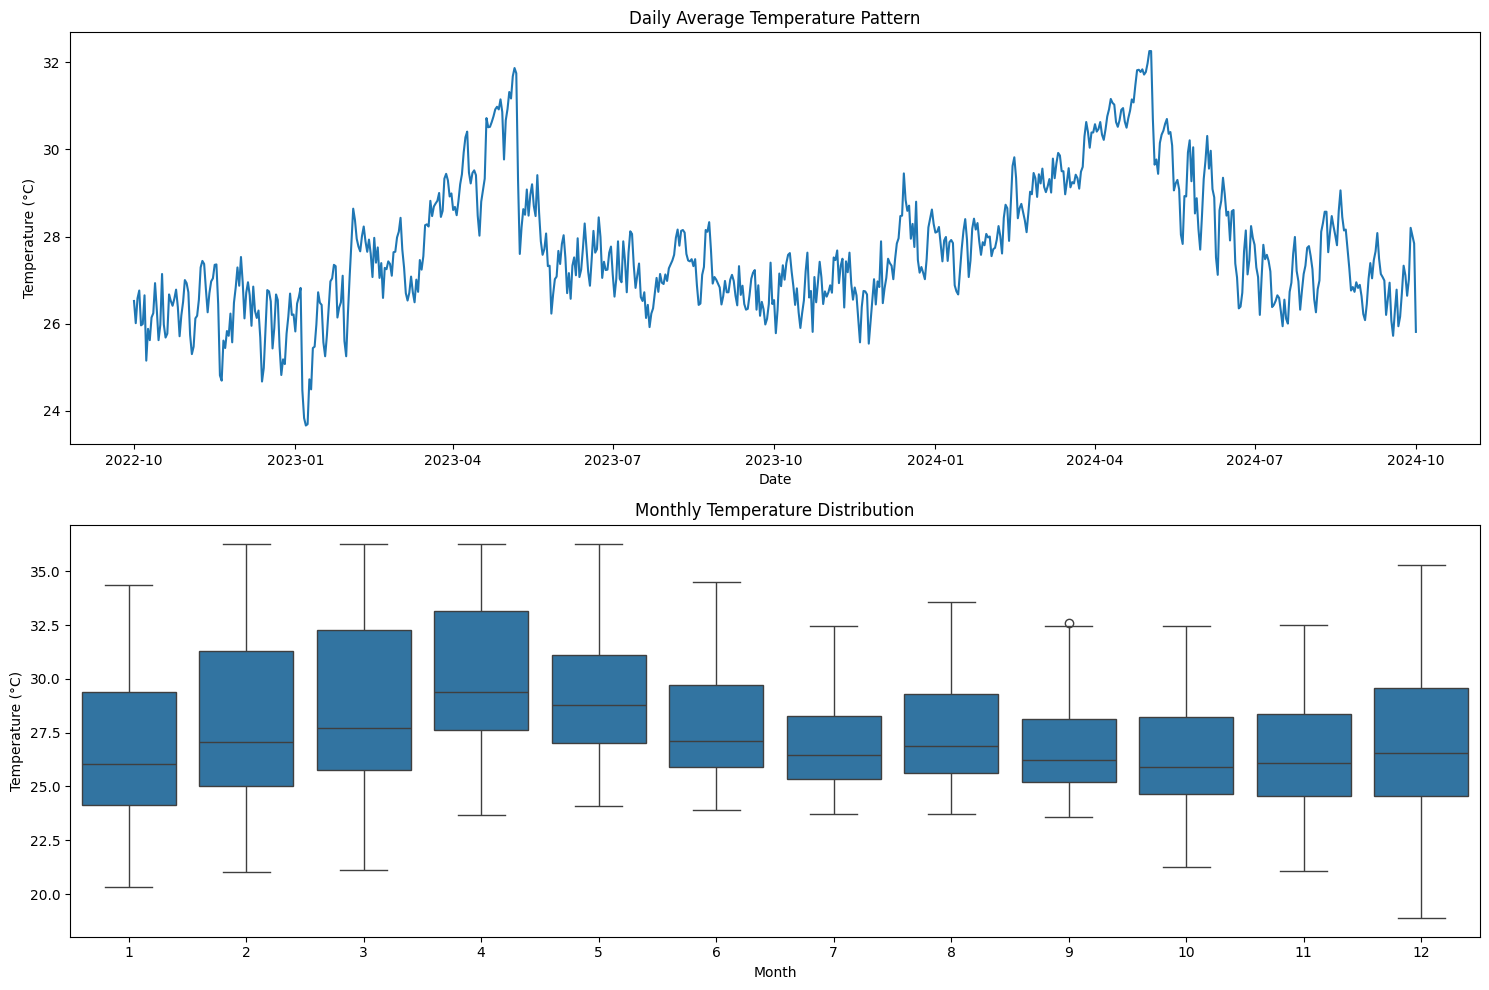

In [31]:
# Plotting temperature patterns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Daily temperature pattern
daily_temps['temperature_2m']['mean'].plot(ax=ax1)
ax1.set_title('Daily Average Temperature Pattern')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')

# Plot 2: Monthly temperature boxplot
sns.boxplot(data=df6, x='month', y='temperature_2m', ax=ax2)
ax2.set_title('Monthly Temperature Distribution')
ax2.set_xlabel('Month')
ax2.set_ylabel('Temperature (°C)')
plt.savefig(question61_path)

plt.tight_layout()
plt.show()

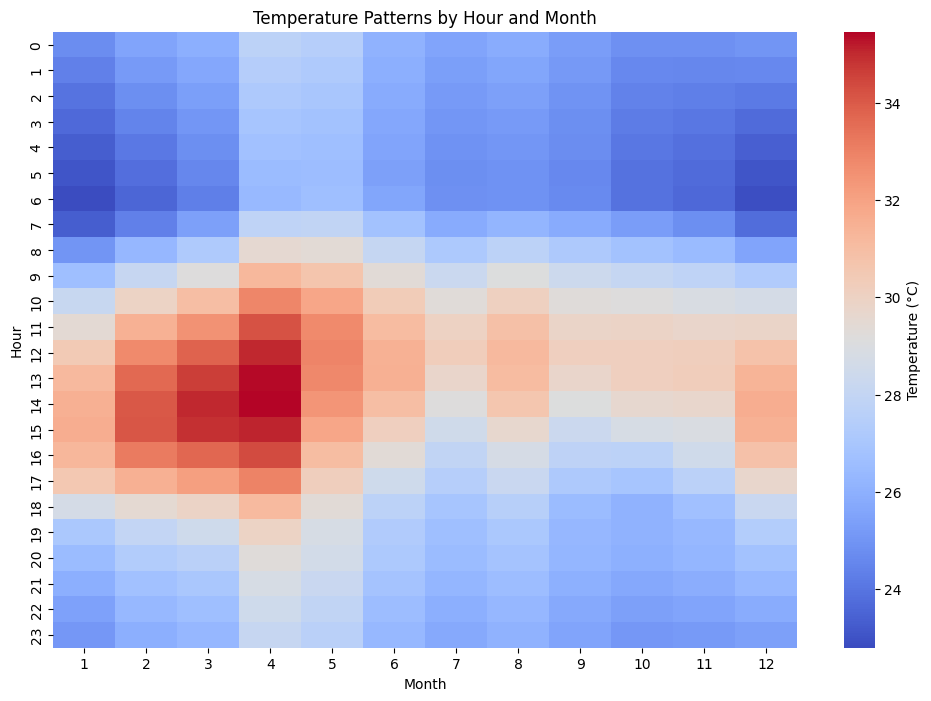

In [32]:
# Heatmap of temperature patterns by hour and month
pivot_temp = df6.pivot_table(values='temperature_2m', 
                           index=df6['date_time'].dt.hour,
                           columns=df6['date_time'].dt.month,
                           aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_temp, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Temperature Patterns by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour')
plt.savefig(question62_path)
plt.show()

#### **Comment**

Based on the temperature patterns across different time periods:
* ***Daily Pattern:*** 
    * Temperature fluctuates between 24°C-32°C
    * Significant peak in April-May 2024 (above 32°C)
    * Most notable anomalies in early May 2024 (+4.5°C above normal)
    * Shows clear cyclical pattern with summer peaks and winter troughs
* ***Monthly Pattern:*** 
    * April has highest mean temperature (30.36°C)
    * December-February show greatest temperature variability
    * Warmest period: March-May (apparent temps up to 40.86°C)
    * Coolest period: July-September (mins around 23.7°C)

$\Rightarrow$ The analysis reveals a climate with distinct monthly variations and significant heat stress potential. While actual temperatures show moderate fluctuations, apparent temperatures can exceed actual temperatures by up to 10°C during peak 4-5-6 months, indicating significant heat stress conditions. The presence of strong daily cycles and monthly patterns, combined with notable anomalies in early 2024, suggests a changing temperature regime that could have important implications for urban planning and public health considerations.